In [1]:
import time
import matplotlib
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format= "svg"

In [2]:
repo_db = pd.read_csv('repoDB.csv')
issue_db = pd.read_csv('issueDB.csv')

In [3]:
conference_count = {}
year_count = {}
for index, paper in repo_db.iterrows():
    conference = paper['Conference_Paper']
    year = paper['Year_Paper']
    if conference in conference_count:
        conference_count[conference] += 1
    else:
        conference_count[conference] = 1
    if year in year_count:
        year_count[year] += 1
    else:
        year_count[year] = 1

In [4]:
print("Statistics of the repoDB")
print(f"Number of repos: {len(repo_db)}")

Statistics of the repoDB
Number of repos: 576


Distribution of conference: 
{'cvpr': 140, 'iclr': 118, 'icml': 47, 'neurips': 76, 'eccv': 37, 'iccv': 78, 'aaai': 4, 'acl': 75, 'aamas': 1}


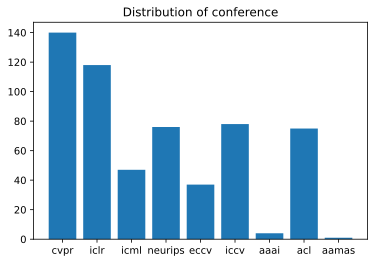

In [5]:
print(f"Distribution of conference: \n{conference_count}")
plt.bar(conference_count.keys(), conference_count.values())
plt.title("Distribution of conference")
plt.show()

Distribution of publication year: 
{2013: 2, 2014: 9, 2015: 17, 2016: 28, 2017: 74, 2018: 120, 2019: 96, 2020: 89, 2021: 77, 2022: 64}


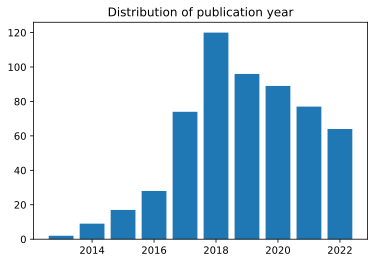

In [6]:
year_count = {k: v for k, v in sorted(year_count.items(), key=lambda item: item[0])}
print(f"Distribution of publication year: \n{year_count}")
plt.bar(year_count.keys(), year_count.values())
plt.title("Distribution of publication year")
plt.show()

Distribution of stars:
count      576.000000
mean       508.036458
std       2626.161951
min          0.000000
25%         17.000000
50%         52.500000
75%        208.000000
max      26315.000000
Name: Num_Star, dtype: float64


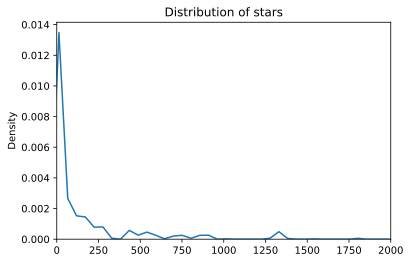

In [7]:
print(f"Distribution of stars:")
print(f"{repo_db['Num_Star'].describe()}")
graph = repo_db['Num_Star'].plot.kde(bw_method=0.001)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0.,right=2000)
plt.title("Distribution of stars")
plt.show()

Distribution of forks:
count      576.000000
mean       136.461806
std        807.077236
min          0.000000
25%          4.000000
50%         11.000000
75%         46.000000
max      11160.000000
Name: Num_Fork, dtype: float64


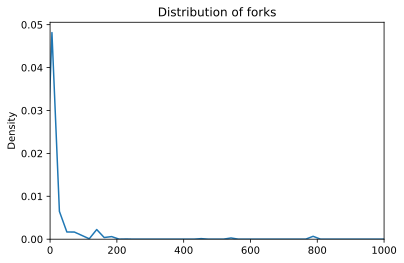

In [8]:
print(f"Distribution of forks:")
print(f"{repo_db['Num_Fork'].describe()}")
graph = repo_db['Num_Fork'].plot.kde(bw_method=0.001)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=1000)
plt.title("Distribution of forks")
plt.show()

Distribution of watchers:
count    576.000000
mean      18.600694
std       69.187661
min        0.000000
25%        3.000000
50%        6.000000
75%       12.000000
max      711.000000
Name: Num_Watcher, dtype: float64


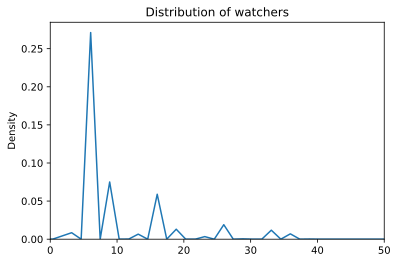

In [9]:
print(f"Distribution of watchers:")
print(f"{repo_db['Num_Watcher'].describe()}")
graph = repo_db['Num_Watcher'].plot.kde(bw_method=0.001)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=50)
plt.title("Distribution of watchers")
plt.show()

In [10]:
repo_with_no_issue = len(repo_db[repo_db.Num_Issue==0])
repo_with_no_open_issue = len(repo_db[repo_db.Num_Issue_Open==0])
repo_with_no_closed_issue = len(repo_db[repo_db.Num_Issue_Closed==0])
repo_number = len(repo_db)
print(f"Total number of repos: {repo_number}")
print(f"Number of repos with no issue: {repo_with_no_issue} ({repo_with_no_issue/repo_number*100:.2f}%)")
print(f"Number of repos with no open issue: {repo_with_no_open_issue} ({repo_with_no_open_issue/repo_number*100:.2f}%)")
print(f"Number of repos with no closed issue: {repo_with_no_closed_issue} ({repo_with_no_closed_issue/repo_number*100:.2f}%)")

Total number of repos: 576
Number of repos with no issue: 122 (21.18%)
Number of repos with no open issue: 206 (35.76%)
Number of repos with no closed issue: 183 (31.77%)


In [11]:
total_num_issue = issue_db.shape[0]
print(f"Total number of issues: {total_num_issue}")
total_num_open_issue = len(issue_db[issue_db.State=='open'])
print(f"Total number of open issues: {total_num_open_issue} ({total_num_open_issue/total_num_issue*100:.2f}%)")
total_num_closed_issue = len(issue_db[issue_db.State=='closed'])
print(f"Total number of closed issues: {total_num_closed_issue} ({total_num_closed_issue/total_num_issue*100:.2f}%)")

Total number of issues: 24953
Total number of open issues: 8102 (32.47%)
Total number of closed issues: 16851 (67.53%)


Distribution of issue close rate: (repos with no issue are excluded)
Number of repos with all closed issues: 81 (14.06%)
count    454.000000
mean       0.567251
std        0.336043
min        0.000000
25%        0.333333
50%        0.600000
75%        0.893056
max        1.000000
dtype: float64


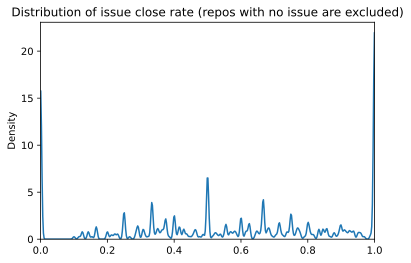

In [12]:
print(f"Distribution of issue close rate: (repos with no issue are excluded)")
closed_rate_list = []
all_closed_issue = 0
for index, repo in repo_db.iterrows():
    if repo['Num_Issue'] == 0:
        continue
    else:
        close_rate = repo['Num_Issue_Closed']/repo['Num_Issue']
        closed_rate_list.append(close_rate)
        if repo['Num_Issue_Open'] == 1:
            all_closed_issue += 1
print(f"Number of repos with all closed issues: {all_closed_issue} ({all_closed_issue/repo_number*100:.2f}%)")
graph = pd.Series(closed_rate_list).plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=1)
closed_rate_list = pd.Series(closed_rate_list)
print(f"{closed_rate_list.describe()}")
plt.title("Distribution of issue close rate (repos with no issue are excluded)")
plt.show()

Distribution of issue resolved time (day):
4
count    16851.000000
mean        46.945107
std        135.344744
min          0.000000
25%          0.000000
50%          4.000000
75%         26.000000
max       2048.000000
dtype: float64


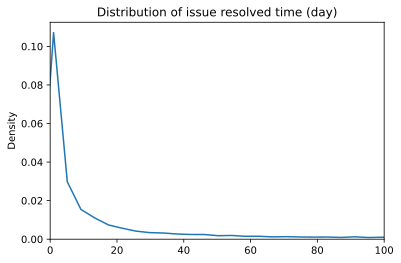

In [13]:
from datetime import datetime
resolve_time_list = []
print(f"Distribution of issue resolved time (day):")

for index, issue in issue_db.iterrows():
    if issue['State'] == 'closed':
        open_date = datetime.strptime(issue['Date_Created'], "%Y-%m-%d %H:%M:%S")
        close_date = datetime.strptime(issue['Date_Closed'], "%Y-%m-%d %H:%M:%S")
        resolve_time = (close_date - open_date).days
        resolve_time_list.append(resolve_time)
print(resolve_time_list[0])
print(f"{pd.Series(resolve_time_list).describe()}")
graph = pd.Series(resolve_time_list).plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=100)
plt.title("Distribution of issue resolved time (day)")
plt.show()

In [14]:
repo_with_label_utilized = 0
repo_with_assignee_utilized = 0
for index, repo in repo_db.iterrows():
    if repo['Num_Issue_Open_No_Label'] + repo['Num_Issue_Closed_No_Label'] < repo['Num_Issue']:
        repo_with_label_utilized += 1
    if repo['Num_Issue_Open_No_Label'] + repo['Num_Issue_Closed_No_Label'] > repo['Num_Issue']:
        print("NANI?")
    if repo['Num_Issue_Open_No_Assignee'] + repo['Num_Issue_Closed_No_Assignee'] < repo['Num_Issue']:
        repo_with_assignee_utilized += 1
    if repo['Num_Issue_Open_No_Assignee'] + repo['Num_Issue_Closed_No_Assignee'] > repo['Num_Issue']:
        print("NANI?")
print(f"Number of repos with label utilized: {repo_with_label_utilized} ({repo_with_label_utilized/len(repo_db)*100:.2f}%)")
print(f"Number of repos with assignee utilized: {repo_with_assignee_utilized} ({repo_with_assignee_utilized/len(repo_db)*100:.2f}%)")
print("PS: repo with no issue is not counted in the above number")

Number of repos with label utilized: 45 (7.81%)
Number of repos with assignee utilized: 34 (5.90%)
PS: repo with no issue is not counted in the above number


In [15]:
issue_with_label = 0
issue_with_assignee = 0
for index, issue in issue_db.iterrows():
    if not pd.isna(issue['Label_Issue']):
        issue_with_label += 1
    if not pd.isna(issue['Assignees']):
        issue_with_assignee += 1
print(f"Number of issues with label utilized: {issue_with_label} ({issue_with_label/len(issue_db)*100:.2f}%)")
print(f"Number of issues with assignee utilized: {issue_with_assignee} ({issue_with_assignee/len(issue_db)*100:.2f}%)")

Number of issues with label utilized: 2849 (11.42%)
Number of issues with assignee utilized: 4104 (16.45%)


In [16]:
default_issue_labels = ['bug', 'documentation', 'duplicate', 'enhancement',
                        'good first issue', 'help wanted', 'invalid', 'question', 'wontfix']
repo_with_new_label = 0
for index, repo in repo_db.iterrows():
    for issue_type in repo["Issue_Types"].split("#"):
        if issue_type not in default_issue_labels:
            #print(issue_type)
            repo_with_new_label += 1
            break
print(f"Number of repos with new label: {repo_with_new_label} ({repo_with_new_label/len(repo_db)*100:.2f}%)")

Number of repos with new label: 83 (14.41%)


Number of unique labels: 109
[('bug', 408), ('enhancement', 305), ('awaiting response', 220), ('community help wanted', 213), ('help wanted', 210), ('good first issue', 169), ('community discussion', 163), ('reimplementation', 154), ('question', 151), ('Feature Request', 104), ('invalid', 83), ('optimizers', 82), ('build', 80), ('seq2seq', 75), ('duplicate', 72), ('documentation', 72), ('contribution welcome', 68), ('feature request', 67), ('Doc', 62), ('layers', 60), ('installation/env', 59), ('xgraph', 58), ('image', 57), ('usage', 56), ('deployment', 49), ('ONNX', 42), ('discussion needed', 41), ('metrics', 39), ('test-cases', 38), ('v-3.x', 36), ('losses', 35), ('planned feature', 29), ('How-to', 29), ('windows', 28), ('tutorials', 26), ('crf', 25), ('triaged', 24), ('Stale', 22), ('activations', 19), ('3dgraph', 19), ('callbacks', 18), ('fixed', 18), ('custom-ops', 16), ('text', 15), ('style', 13), ('needs more info', 12), ('bootcamp', 11), ('wontfix', 10), ('in progress', 10), ('

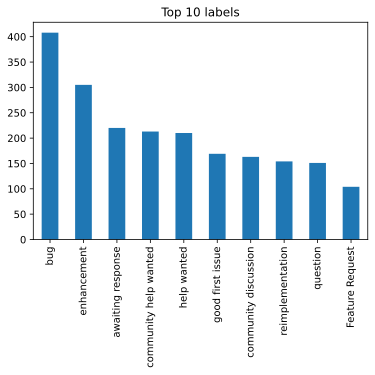

In [17]:
# Count the occurrence of each label
label_count = {}
for index, issue in issue_db.iterrows():
    if not pd.isna(issue['Label_Issue']):
        for label in issue['Label_Issue'].split("#"):
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
print(f"Number of unique labels: {len(label_count)}")
print(sorted(label_count.items(), key=lambda x: x[1], reverse=True))
print(f"Top 10 labels:")
print(sorted(label_count.items(), key=lambda x: x[1], reverse=True)[:10])
graph = pd.Series(label_count).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 labels")
plt.show()


Number of unique labels (academia): 27
[('enhancement', 100), ('xgraph', 58), ('question', 51), ('good first issue', 48), ('bug', 31), ('3dgraph', 19), ('documentation', 17), ('help wanted', 15), ('Resolved', 10), ('ggraph', 6), ('wontfix', 5), ('sslgraph', 3), ('duplicate', 3), ('todo', 2), ('fixed', 2), ('InProgress', 2), ('Literatures', 2), ('result reproduced', 2), ('Old GLUE', 2), ('benchmark', 1), ('ggraph3D', 1), ('Wait a moment', 1), ('invalid', 1), ('contributions welcome', 1), ('MTL Alg', 1), ('solved', 1), ('Future implement list', 1)]
Number of unique labels (industry): 92
[('bug', 377), ('awaiting response', 220), ('community help wanted', 213), ('enhancement', 205), ('help wanted', 195), ('community discussion', 163), ('reimplementation', 154), ('good first issue', 121), ('Feature Request', 104), ('question', 100), ('invalid', 82), ('optimizers', 82), ('build', 80), ('seq2seq', 75), ('duplicate', 69), ('contribution welcome', 68), ('feature request', 67), ('Doc', 62), ('l

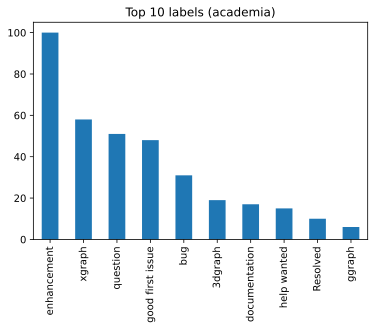

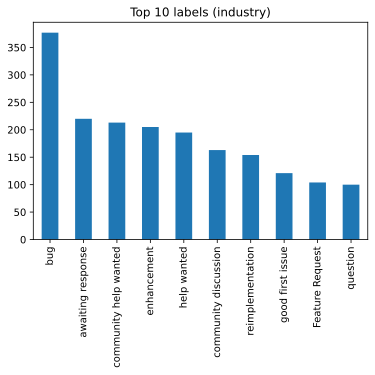

In [18]:
# Count the occurrence of each label （Comparing academia and industry)
label_count_academia = {}
label_count_industry = {}
for index, issue in issue_db.iterrows():
    if not pd.isna(issue['Label_Issue']):
        type = "" # academia or industry
        for index, repo in repo_db.iterrows():
            repo_name_iter = repo['Name_Repo'].split("/")
            repo_name = repo_name_iter[0] + "/" + repo_name_iter[1]
            if repo_name == issue['Name_Repo']:
                type = repo['Owners']
                break
        if type == "academia":
            for label in issue['Label_Issue'].split("#"):
                if label in label_count_academia:
                    label_count_academia[label] += 1
                else:
                    label_count_academia[label] = 1
        elif type == "industry":
            for label in issue['Label_Issue'].split("#"):
                if label in label_count_industry:
                    label_count_industry[label] += 1
                else:
                    label_count_industry[label] = 1
        else:
            print("NANI?")
print(f"Number of unique labels (academia): {len(label_count_academia)}")
print(sorted(label_count_academia.items(), key=lambda x: x[1], reverse=True))
print(f"Number of unique labels (industry): {len(label_count_industry)}")
print(sorted(label_count_industry.items(), key=lambda x: x[1], reverse=True))
print(f"Top 10 labels (academia):")
print(sorted(label_count_academia.items(), key=lambda x: x[1], reverse=True)[:10])
print(f"Top 10 labels (industry):")
print(sorted(label_count_industry.items(), key=lambda x: x[1], reverse=True)[:10])
graph = pd.Series(label_count_academia).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 labels (academia)")
plt.show()
graph = pd.Series(label_count_industry).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 labels (industry)")
plt.show()

Number of unique labels (with mono repo dropped): 55
[('enhancement', 270), ('bug', 229), ('awaiting response', 220), ('community help wanted', 213), ('community discussion', 163), ('reimplementation', 154), ('question', 98), ('invalid', 80), ('duplicate', 69), ('feature request', 67), ('Doc', 62), ('installation/env', 59), ('xgraph', 58), ('usage', 56), ('good first issue', 51), ('deployment', 49), ('ONNX', 42), ('v-3.x', 36), ('planned feature', 29), ('How-to', 29), ('help wanted', 25), ('windows', 22), ('Stale', 22), ('3dgraph', 19), ('documentation', 17), ('Resolved', 10), ('Dev-RD', 9), ('wontfix', 7), ('upstream', 6), ('WIP', 6), ('ggraph', 6), ('v-2.x', 5), ('P0', 4), ('upcoming', 4), ('major-new-functionality', 4), ('P1', 3), ('sslgraph', 3), ('dependencies', 3), ('low-priority', 3), ('todo', 2), ('fixed', 2), ('InProgress', 2), ('Literatures', 2), ('result reproduced', 2), ('Old GLUE', 2), ('typo', 1), ('fp16', 1), ('need-more-info', 1), ('benchmark', 1), ('ggraph3D', 1), ('Wa

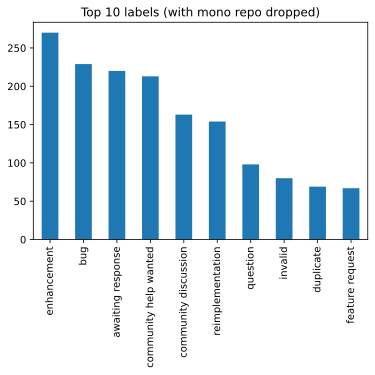

In [19]:
#Count the occurrence of each label with mono repo removed
label_count = {}
for index, issue in issue_db.iterrows():
    repo = repo_db[repo_db['Name_Repo']==issue['Name_Repo']]
    if repo.empty: # In this case, the repo is a nested repo URL (e.g. google-research/federated/blob/master/README.md)
        continue
    if repo['Mono_Repo'].iloc[0] == 1: # In this case, the repo is marked as a mono repo
        #print(issue['Name_Repo'])
        continue
    if not pd.isna(issue['Label_Issue']):
        for label in issue['Label_Issue'].split("#"):
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
print(f"Number of unique labels (with mono repo dropped): {len(label_count)}")
print(sorted(label_count.items(), key=lambda x: x[1], reverse=True))
print(f"Top 10 labels (with mono repo dropped):")
print(sorted(label_count.items(), key=lambda x: x[1], reverse=True)[:10])
graph = pd.Series(label_count).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 labels (with mono repo dropped)")
plt.show()

Distribution of number of comments per issue:
count    24953.000000
mean         2.977999
std          5.094887
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        193.000000
Name: Num_Comment, dtype: float64


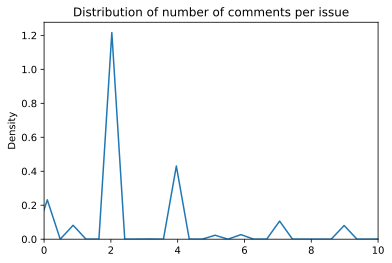

In [20]:
print('Distribution of number of comments per issue:')
comment_count_list = []
for index, issue in issue_db.iterrows():
    comment_count_list.append(issue['Num_Comment'])
print(f"{issue_db['Num_Comment'].describe()}")
graph = issue_db['Num_Comment'].plot.kde(bw_method=0.01)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0., right=10)
plt.title("Distribution of number of comments per issue")
plt.show()

In [21]:
self_closed_issue = 0
total_num_closed_issue = issue_db[issue_db['State'] == 'closed'].shape[0]
for index, issue in issue_db.iterrows():
    if issue['State'] == 'closed' and pd.isna(issue['Proposed_By']):
        print("NANI?")
    if issue['State'] == 'closed' and issue['Proposed_By'] == issue['Closed_By']:
        self_closed_issue += 1
print(f"Number of self closed issue: {self_closed_issue} ({self_closed_issue/total_num_closed_issue*100:.2f}%)")

Number of self closed issue: 6740 (40.00%)


In [29]:
import scipy

# Check the distribution difference of having labels between open and closed issues
open_issue_db = issue_db[issue_db['State'] == 'open']
closed_issue_db = issue_db[issue_db['State'] == 'closed']
open_issue_num = open_issue_db.shape[0]
print(f"Number of open issues: {open_issue_num}")
closed_issue_num = closed_issue_db.shape[0]
print(f"Number of closed issues: {closed_issue_num}")
open_issue_with_label_num = open_issue_db[~open_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of open issues with labels: {open_issue_with_label_num} ({open_issue_with_label_num/open_issue_num*100:.2f}%)")
open_issue_without_label_num = open_issue_db[open_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of open issues without labels: {open_issue_without_label_num} ({open_issue_without_label_num/open_issue_num*100:.2f}%)")
closed_issue_with_label_num = closed_issue_db[~closed_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of closed issues with labels: {closed_issue_with_label_num} ({closed_issue_with_label_num/closed_issue_num*100:.2f}%)")
closed_issue_without_label_num = closed_issue_db[closed_issue_db['Label_Issue'].isna()].shape[0]
print(f"Number of closed issues without labels: {closed_issue_without_label_num} ({closed_issue_without_label_num/closed_issue_num*100:.2f}%)")

open_issue_list = [0 if pd.isna(x) else 1 for x in open_issue_db['Label_Issue']]
closed_issue_list = [0 if pd.isna(x) else 1 for x in closed_issue_db['Label_Issue']]
result = scipy.stats.ranksums(open_issue_list, closed_issue_list)
print(f"{result}")

Number of open issues: 8102
Number of closed issues: 16851
Number of open issues with labels: 504 (6.22%)
Number of open issues without labels: 7598 (93.78%)
Number of closed issues with labels: 2345 (13.92%)
Number of closed issues without labels: 14506 (86.08%)
RanksumsResult(statistic=-9.858953134754442, pvalue=6.26996801505517e-23)


In [32]:
# Check the distribution difference of having assignees between open and closed issues
open_issue_with_assignee_num = open_issue_db[~open_issue_db['Assignees'].isna()].shape[0]
print(f"Number of open issues with assignees: {open_issue_with_assignee_num} ({open_issue_with_assignee_num/open_issue_num*100:.2f}%)")
open_issue_without_assignee_num = open_issue_db[open_issue_db['Assignees'].isna()].shape[0]
print(f"Number of open issues without assignees: {open_issue_without_assignee_num} ({open_issue_without_assignee_num/open_issue_num*100:.2f}%)")
closed_issue_with_assignee_num = closed_issue_db[~closed_issue_db['Assignees'].isna()].shape[0]
print(f"Number of closed issues with assignees: {closed_issue_with_assignee_num} ({closed_issue_with_assignee_num/closed_issue_num*100:.2f}%)")
closed_issue_without_assignee_num = closed_issue_db[closed_issue_db['Assignees'].isna()].shape[0]
print(f"Number of closed issues without assignees: {closed_issue_without_assignee_num} ({closed_issue_without_assignee_num/closed_issue_num*100:.2f}%)")
open_issue_list = [0 if pd.isna(x) else 1 for x in open_issue_db['Assignees']]
closed_issue_list = [0 if pd.isna(x) else 1 for x in closed_issue_db['Assignees']]
result = scipy.stats.ranksums(open_issue_list, closed_issue_list)
print(f"{result}")

Number of open issues with assignees: 425 (5.25%)
Number of open issues without assignees: 7677 (94.75%)
Number of closed issues with assignees: 3679 (21.83%)
Number of closed issues without assignees: 13172 (78.17%)
RanksumsResult(statistic=-21.250301153632396, pvalue=3.2755800806160853e-100)
